1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

2. Загрузите датасет в pandas DataFrame под названием df.

3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

5. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [52]:
# pip install pandas
# pip install -U matplotlib
# !pip install seaborn


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy import stats
from IPython.display import display, HTML # HTML(df.to_html())
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('./kaggle_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Так же мы видим пропуски в следующих столбцах - Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, PoolQC, Fence, MiscFeature.
Так же заполним данные этих колонок средними или None значениями в завивисмости от структуры данных.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Изучим имеющиеся данные и попробуем понять сущность значений. Для начала переведем все значения.

- SalePrice - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
- MSSubClass: класс здания. [60,20,70,50,190,45,90,120,30,85,80,160,75,80,40]
- MSZoning: Общая классификация зонирования.['RL', 'RM', 'C (all)', 'FV', 'RH']
- LotFrontage: погонные футы улицы, соединенной с участком.
- LotArea: Размер участка в квадратных футах.
- Street: Тип подъезда к дороге. ['Pave', 'Grvl'] - аналог грунтовки и гравийки.
- Alley: Тип доступа к переулку. [nan, 'Grvl', 'Pave']
- LotShape: Общая форма объекта недвижимости. ['Reg', 'IR1', 'IR2', 'IR3']
- LandContour: Ровность участка. ['Lvl', 'Bnk', 'Low', 'HLS']
- Utilities: Типы доступных утилит. ['AllPub', 'NoSeWa']
- LotConfig:  Конфигурация лота. ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
- LandSlope: Уклон участка. ['Gtl', 'Mod', 'Sev']
- Neighborhood: Физические местоположения в пределах города Эймс.
- Condition1: Близость к главной дороге или железной дороге. [Norm',Feedr',PosN',Artery',RRAe',RRNn',RRAn',PosA',RRNe']
- Condition2: Близость к главной дороге или железной дороге (при наличии второй)
- BldgType: Тип жилья. ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
- HouseStyle: Стиль жилища ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf','2.5Fin']
- OverallQual: общее качество материала и отделки. [ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2]
- OverallCond: общая оценка состояния.
- YearBuilt: дата первоначального строительства.
- YearRemodAdd: дата ремоделирования.
- RoofStyle: Тип крыши. ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
- RoofMatl: Материал крыши. ['CompShg','WdShngl', 'Metal','WdShake','Membran','Tar&Grv','Roll','ClyTile']
- Exterior1st: Наружное покрытие дома.
- Exterior2nd: Наружное покрытие дома (если более одного материала)
- MasVnrType: тип каменной кладки. ['BrkFace', nan, 'Stone', 'BrkCmn']
- MasVnrArea: площадь каменной кладки в квадратных футах.
- ExterQual: Качество материала экстерьера.
- ExterCond: Текущее состояние материала снаружи.
- Foundation: Тип фундамента
- BsmtQual: Высота подвала.
- BsmtCond: Общее состояние подвала.
- BsmtExposure: стены подвала на уровне сада или выходного этажа.
- BsmtFinType1: Качество готовой площади подвала.
- BsmtFinSF1: готовые квадратные футы типа 1.
- BsmtFinType2: Качество второй законченной области (если присутствует).
- BsmtFinSF2: готовые квадратные футы типа 2.
- BsmtUnfSF: Незаконченные квадратные футы подвала.
- TotalBsmtSF: Общая площадь подвала в квадратных футах.
- Heating: Тип отопления
- HeatingQC: качество и состояние отопления.
- CentralAir: Центральное кондиционирование.
- Electrical: Электрическая система
- 1stFlrSF: квадратные футы первого этажа.
- 2ndFlrSF: квадратные футы второго этажа.
- LowQualFinSF: квадратные футы с отделкой низкого качества (все этажи)
- GrLivArea: жилая площадь над землей, квадратные футы.
- BsmtFullBath: Полностью оборудованные ванные комнаты в подвале.
- BsmtHalfBath: Полуванные комнаты в подвале.
- FullBath: полностью оборудованные ванные комнаты над уровнем моря.
- HalfBath: полуванны выше уровня.
- Bedroom: Количество спален над цокольным этажом
- Kitchen: Количество кухонь
- KitchenQual: Качество кухни
- TotRmsAbvGrd: общее количество комнат выше уровня (без ванных комнат).
- Functional: Рейтинг функциональности дома
- Fireplaces: Количество каминов
- FireplaceQu: Качество камина
- GarageType: расположение гаража.
- GarageYrBlt: год постройки гаража.
- GarageFinish: Внутренняя отделка гаража.
- GarageCars: Размер гаража по вместимости автомобиля.
- GarageArea: Размер гаража в квадратных футах.
- GarageQual: качество гаража.
- GarageCond: состояние гаража.
- PavedDrive: Асфальтированная подъездная дорога
- WoodDeckSF: Площадь деревянного настила в квадратных футах.
- OpenPorchSF: площадь открытой веранды в квадратных футах.
- EnclosedPorch: площадь крытой веранды в квадратных футах.
- 3SsnPorch: Трехсезонная веранда в квадратных футах.
- ScreenPorch: площадь веранды в квадратных футах.
- PoolArea: Площадь бассейна в квадратных футах.
- PoolQC: Качество бассейна.
- Fence: Качество забора
- MiscFeature: Разные функции, не вошедшие в другие категории
- MiscVal: $Значение различных функций.
- MoSold: Месяц продажи
- YrSold: Год продажи
- SaleType: Тип продажи
- SaleCondition: Состояние продажи.

In [5]:
# Изучим содержимое столбцов и диапазон возможных значений. Дополним этими данными перевод терминов.
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Значения в столбце '{col}': {unique_values}")

Значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Значения в столбце 'Street': ['Pave' 'Grvl']
Значения в столбце 'Alley': [nan 'Grvl' 'Pave']
Значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Значения в столбце 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Значения в столбце 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'

Изучив содержание наших данных мы понимаем приблизительные зависимости параметров здания и его цены. В зависимости от поставленной задачи мы можем видоизменять исходные данные очищая их от малозначимых для нашей задачи данных, либо наоборот дополняя производными в зависимости от совокупности параметров отдельного объекта.
В нашем случае нам будет достаточно простой очистки данных, без погружения в суть будущего исследования этих данных.

In [6]:
# Проверим данные на наличие дубликатов.
duplicates = df.duplicated()
duplicates.unique()

array([False])

В нашем датасете нет дублирующихся строк.

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Мы видим что у нас есть пропущенные данные в столбце LotFrontage - погонные футы улицы, соединенной с участком.  

In [8]:
# Изучим более подробно данные в строках в которых есть пропуск. После изучения комментируем строку для экономии вычислительных ресурсов.
# HTML(df.to_html())

Без серьезных исследований взаимосвязи данных сложно определить по какому принцицу заполнять пропущенные значенияЮ но удалять эти строки нельзя, так как они составляют почти 20%. Возможно нужно нормализовать данные в зависимости от параметра LotArea по принципу - чем большее общая площадь тем больше территории имеет долступ к улице. 
В нашем случае мы применим заполение пропусков простым средним значением.

In [9]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

C:\Users\Лина\AppData\Local\Temp\ipykernel_11056\2804243339.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)


Так же мы видим пропуски в следующих столбцах - Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, PoolQC, Fence, MiscFeature.
Так же заполним данные этих колонок средними или None значениями в завивисмости от структуры данных.
Можно написать скрипт проверяющий тип данных и количество пропущенных значений. Если пропуском меньше определенного порогвоого значения, то при наличие в списке уникальных значений NaN заменять все пропуски на него. С числовыми значениями - заменять на среднее.

In [10]:
df['Alley'] = df['Alley'].fillna("NaN")

In [11]:
df['MasVnrType'] = df['MasVnrType'].fillna("NaN")

In [12]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

C:\Users\Лина\AppData\Local\Temp\ipykernel_11056\3672611899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)


In [13]:
df['MasVnrType'] = df['MasVnrType'].fillna("NaN")

In [14]:
df['BsmtCond'] = df['BsmtCond'].fillna("NaN")

In [15]:
df['BsmtExposure'] = df['BsmtExposure'].fillna("NaN")

In [16]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NaN")

In [17]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NaN")

In [18]:
df['Electrical'] = df['Electrical'].fillna("NaN")

In [19]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NaN")

In [20]:
df['GarageType'] = df['GarageType'].fillna("NaN")

In [21]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)

C:\Users\Лина\AppData\Local\Temp\ipykernel_11056\1019742029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)


In [22]:
df['BsmtQual'] = df['BsmtQual'].fillna("NaN")

In [23]:
df['GarageFinish'] = df['GarageFinish'].fillna("NaN")

In [24]:
df['GarageQual'] = df['GarageQual'].fillna("NaN")

In [25]:
df['GarageCond'] = df['GarageCond'].fillna("NaN")

In [26]:
# Со столбцом PoolQC странная ситцация info дает следующее описание [72 PoolQC 7 non-null object]. Ручной простомтр всех значений показывает что все значения 
# равны NaN. По сути этот столюец лучше удалить, так как он не енсет никаких полезных данных. Но в рамках общего алгоритма обработки сохраним прежний подход.
df['PoolQC'] = df['PoolQC'].fillna("NaN")

In [27]:
df['Fence'] = df['Fence'].fillna("NaN")

In [28]:
df['MiscFeature'] = df['MiscFeature'].fillna("NaN")

После всех обработок посмотрим на текущее состояние датафрейма.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Проведем разведочный анализ данных (EDA) исходя из задания.

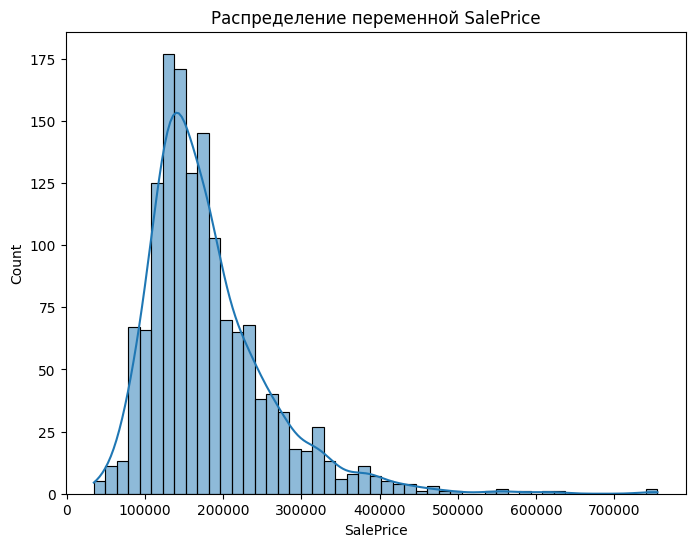

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df["SalePrice"], kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("Распределение переменной SalePrice")
plt.show()

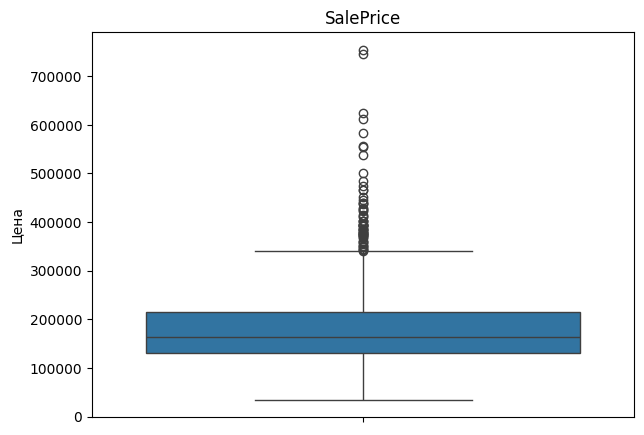

In [32]:
# График boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, y='SalePrice')
plt.title('SalePrice')
plt.ylabel('Цена')
plt.show()

Мы видим что данные со значение цены выше 350000 можно отнести к выбросам.

Далее мы можем изучить корреляции между параметрами используя матрицу корреляции. Для этого создадим датафрейм содержащий в себе данные числового формата. При необходимости мы можем нормализовать все данные и преотбазовать их к числовому формату, но в рамках учебной задачи в этом нет необходимости.

In [33]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Нам нужно выбрать данные между которыми есть зависимости. Используем коэффициен Спирмена для поиска зависимостей.

In [35]:
correlated_data = {}
for col in numeric_data.columns:
    if col != 'SalePrice':
        spearman, p_value = spearmanr(df['SalePrice'], df[col])
        correlated_data[col] = {'Spearman': spearman, 'p_value': p_value}

df_corr = pd.DataFrame.from_dict(correlated_data, orient='index')

print("Коэффициенты Спирмена и  р-значения c параметром", 'SalePrice', ":")
print(df_corr)

Коэффициенты Спирмена и  р-значения c параметром SalePrice :
               Spearman        p_value
Id            -0.018546   4.788948e-01
MSSubClass     0.007192   7.836360e-01
LotFrontage    0.390963   1.616631e-54
LotArea        0.456461   4.871581e-76
OverallQual    0.809829   0.000000e+00
OverallCond   -0.129325   7.118552e-07
YearBuilt      0.652682  5.693841e-178
YearRemodAdd   0.571159  3.557233e-127
MasVnrArea     0.422884   2.059129e-64
BsmtFinSF1     0.301871   3.857909e-32
BsmtFinSF2    -0.038806   1.383221e-01
BsmtUnfSF      0.185197   9.886861e-13
TotalBsmtSF    0.602725  4.157300e-145
1stFlrSF       0.575408  1.780246e-129
2ndFlrSF       0.293598   2.040344e-30
LowQualFinSF  -0.067719   9.645078e-03
GrLivArea      0.731310  1.431015e-244
BsmtFullBath   0.225125   3.130150e-18
BsmtHalfBath  -0.012189   6.416775e-01
FullBath       0.635957  2.729574e-166
HalfBath       0.343008   1.422950e-41
BedroomAbvGr   0.234907   9.402132e-20
KitchenAbvGr  -0.164826   2.358516e-10
Tot

In [37]:
# Для дальнейшего изучения выберем только колонки с коэффициентом Спирмена больше 0,7 и с p-value меньше 0,05

high_corr = {col: values for col, values in correlated_data.items() if values['Spearman'] > 0.7 and values['p_value'] <= 0.05}
df_high_corr = pd.DataFrame.from_dict(high_corr, orient='index')

print(f"Высокая корреляция переменных с SalePrice : {df_high_corr}")

Высокая корреляция переменных с SalePrice :              Spearman        p_value
OverallQual  0.809829   0.000000e+00
GrLivArea    0.731310  1.431015e-244


Мы выяыили два значимых параметра - OverallQual и GrLivArea. По условиях мазачи нам предлагают добавить еще несколько параметров - выберем GarageCars и
LotArea.

In [45]:
high_corr_params = ['OverallQual', 'GrLivArea', 'GarageCars', 'LotArea', 'SalePrice']
df_matrix = df[high_corr_params].corr()
df_matrix.head()


,OverallQual,GrLivArea,GarageCars,LotArea,SalePrice
OverallQual,1.000000,0.593007,0.600671,0.105806,0.790982
GrLivArea,0.593007,1.000000,0.467247,0.263116,0.708624
GarageCars,0.600671,0.467247,1.000000,0.154871,0.640409
LotArea,0.105806,0.263116,0.154871,1.000000,0.263843
SalePrice,0.790982,0.708624,0.640409,0.263843,1.000000


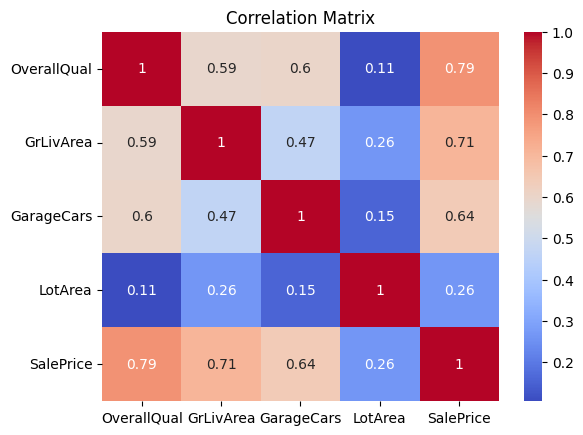

In [46]:
sns.heatmap(df_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

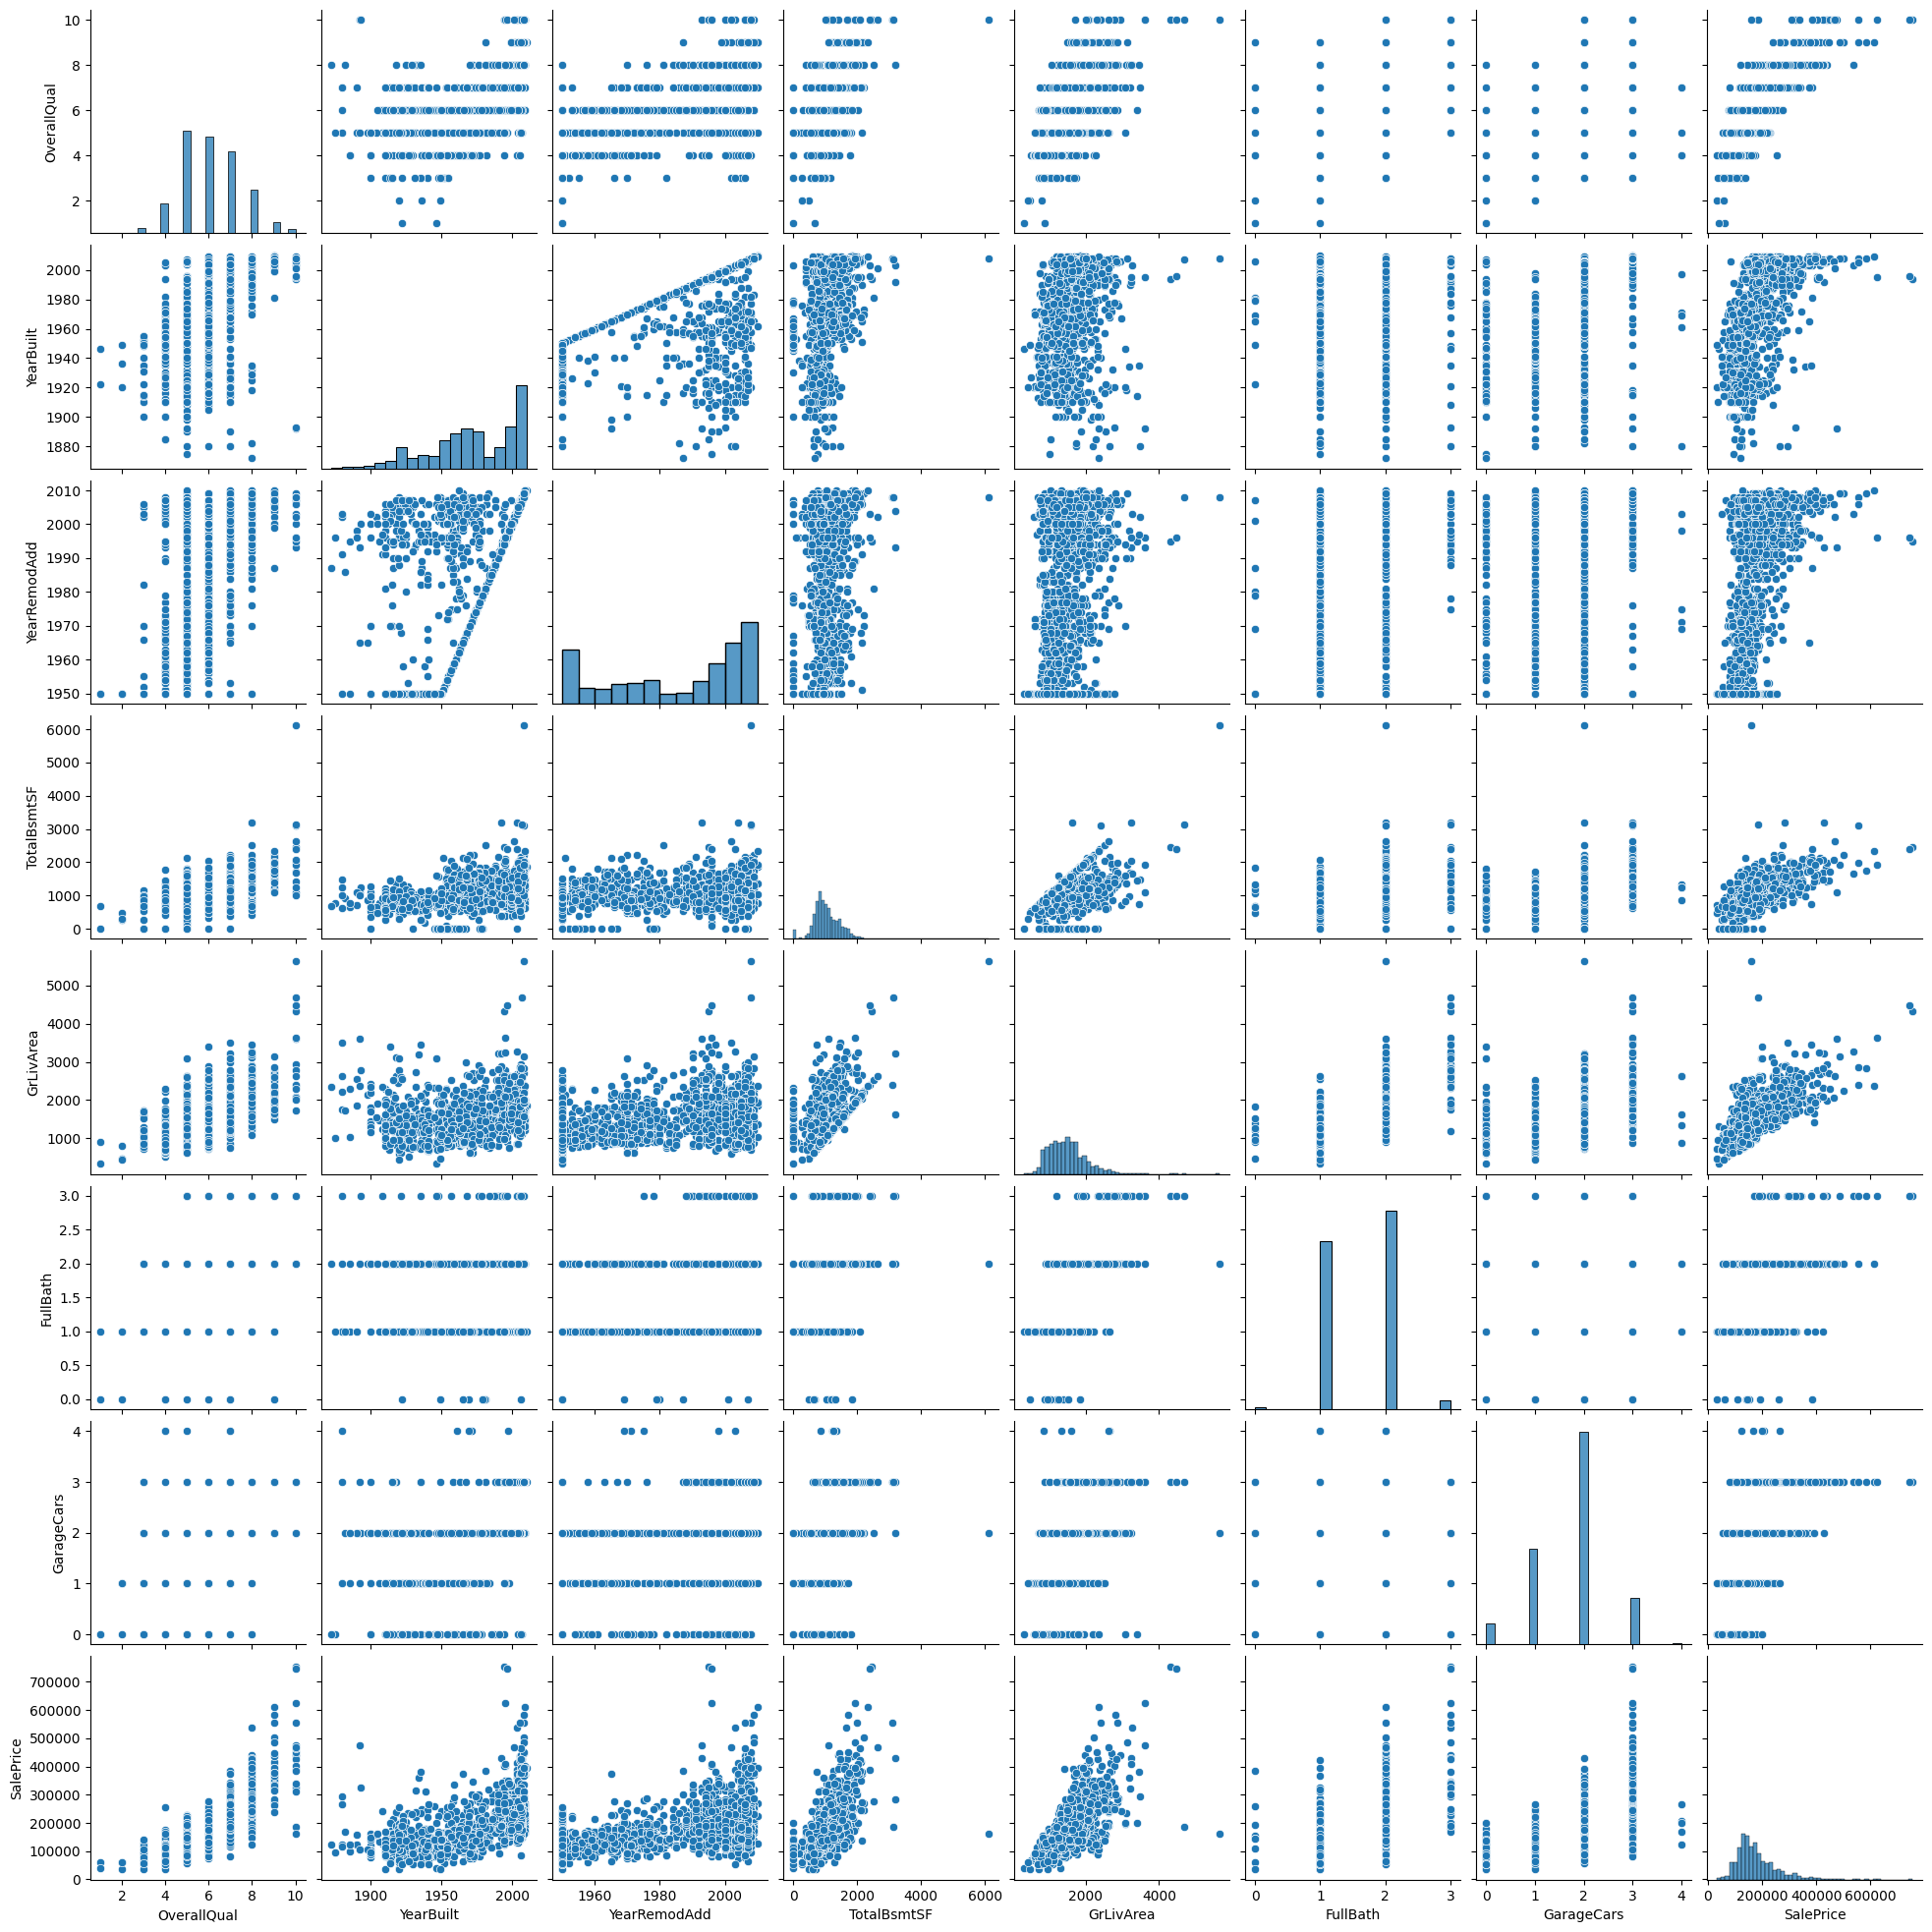

In [48]:
# Мы уже можем сделать некие выводы о зависимых параметрах. ДЛя наглядности используем и другие иетоды визуализации.
alt_params = ['OverallQual',  'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice']
df_alt = df[alt_params]
sns.pairplot(df_alt)
plt.show()

Из количественных параметров стат значимые зависимости были выявлены лишь у нескольких данных. Выполним преобразование категориальных значений в числовые. Мы не знаем иностранную классификацию в оценке изучаемых объектов , потому в учебных целях сделаем преобразование без строгого соответствия смыслу значений.
MSZoning: Общая классификация зонирования.['RL', 'RM', 'C (all)', 'FV', 'RH'] Описание параметра предполагает его возможную значимость. Используем его для преобразований.

In [54]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [55]:
label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])
df['MSZoning'].unique()

array([3, 4, 0, 1, 2])

Создадим новый столбец объединяя данные из существующих.

MoSold: Месяц продажи
YrSold: Год продажи


In [58]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [59]:
# Создадим малый датасет содержащий данные о месяце и годе продажи. И создадим новый столбец объединяющий эти значения.
date = ['MoSold', 'YrSold']
df_date = df[date]
df_date

,MoSold,YrSold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008
...,...,...
1455,8,2007
1456,2,2010
1457,5,2010
1458,4,2010


In [63]:
df_date['Date'] = df_date['MoSold'].map(str) + '-' + df_date['YrSold'].map(str)
df_date

C:\Users\Лина\AppData\Local\Temp\ipykernel_11056\2411986142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['Date'] = df_date['MoSold'].map(str) + '-' + df_date['YrSold'].map(str)


,MoSold,YrSold,Date
0,2,2008,2-2008
1,5,2007,5-2007
2,9,2008,9-2008
3,2,2006,2-2006
4,12,2008,12-2008
...,...,...,...
1455,8,2007,8-2007
1456,2,2010,2-2010
1457,5,2010,5-2010
1458,4,2010,4-2010


In [64]:
# В итоге запишем очищенные данные в новый файл.
df.to_csv('cleaned_house_prices.csv', index=False)